# Final Project

**Due date: Saturday, December 9th**

For your final project you will develop a data narrative with a dataset of your choosing. Your data can come from any source. You do not have to comprehensively explore your data. Pick an interesting aspect or two from which to build your narrative.

## Requirements

- At least **three** visualizations. Visualizations can be simple bar charts that total data categories or rich exploratory figures. (*Tables also count as visualizations but you must have at least two charts.*) 
- All of the code should be recorded in your narrative. That is, I should be able to run your notebook code start to finish re-producing each of your outputs without error.
- At least **two** but no more than **three** paragraphs walking the reader through your analysis.
- Charts should exhibit your command of `ggplot2/dplyr/forcats/tidyr` with: 
  - sensibly sorted categories, 
  - interpretable labels/axis titles, 
  - useful annotations (when applicable), 
  - adjustments to default chart aesthetics, 
  - appropriate markings (e.g. `geoms`) and encodings.

## Notes

*This project should not take you longer than the time to complete two of our assignments. It is meant to demonstrate that you can build an analysis using `R` and the `Tidyverse` from scratch. Focus your analysis on a small number of data features that you find interesting.*

*Remember all the ways of visualizing distributions (ECDFs, histograms, jitter-ed scatter plots, etc.). These will come in very handy!* 

In [4]:
library('tidyverse')

Warning message:
“Failed to locate timezone database”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.3     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [5]:
library('readxl')

In [6]:
centenrians = read.csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2023/2023-05-30/centenarians.csv')

In [7]:
centenrians |> head()

,rank,name,birth_date,death_date,age,place_of_death_or_residence,gender,still_alive
,<int>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>
1,1,Jeanne Calment,1875-02-21,1997-08-04,122.4476,France,female,deceased
2,2,Kane Tanaka,1903-01-02,2022-04-19,119.2936,Japan,female,deceased
3,3,Sarah Knauss,1880-09-24,1999-12-30,119.2608,United States,female,deceased
4,4,Lucile Randon,1904-02-11,2023-01-17,118.9322,France,female,deceased
5,5,Nabi Tajima,1900-08-04,2018-04-21,117.7112,Japan,female,deceased
6,6,Marie-Louise Meilleur,1880-08-29,1998-04-16,117.6263,Canada,female,deceased


To begin, we want to be able to see which countries most frequently occur in this table. This will tell us which countries have the most number of people who lived to be the oldest. This will give us a sense of which countries we can then analyze deeper to then see factors allowed these trend results occurred. So, we will use the grouped by and summarize functions to get each country's count of number of oldest people living and then sort. 

In [8]:
#PLot #1 (table)
c_grouped = centenrians |>
group_by(place_of_death_or_residence) |>
summarize(count = n()) |> 
top_n(n = 10, wt = count)
c_grouped

place_of_death_or_residence,count
<chr>,<int>
Brazil,6
Canada,5
France,9
Italy,9
Japan,46
Mexico,4
Portugal,5
Spain,9
United Kingdom,9


Here we have plotted each country on a barplot so that we can see the top 10 countries. US and Japan have a large number of people by a landslide. 

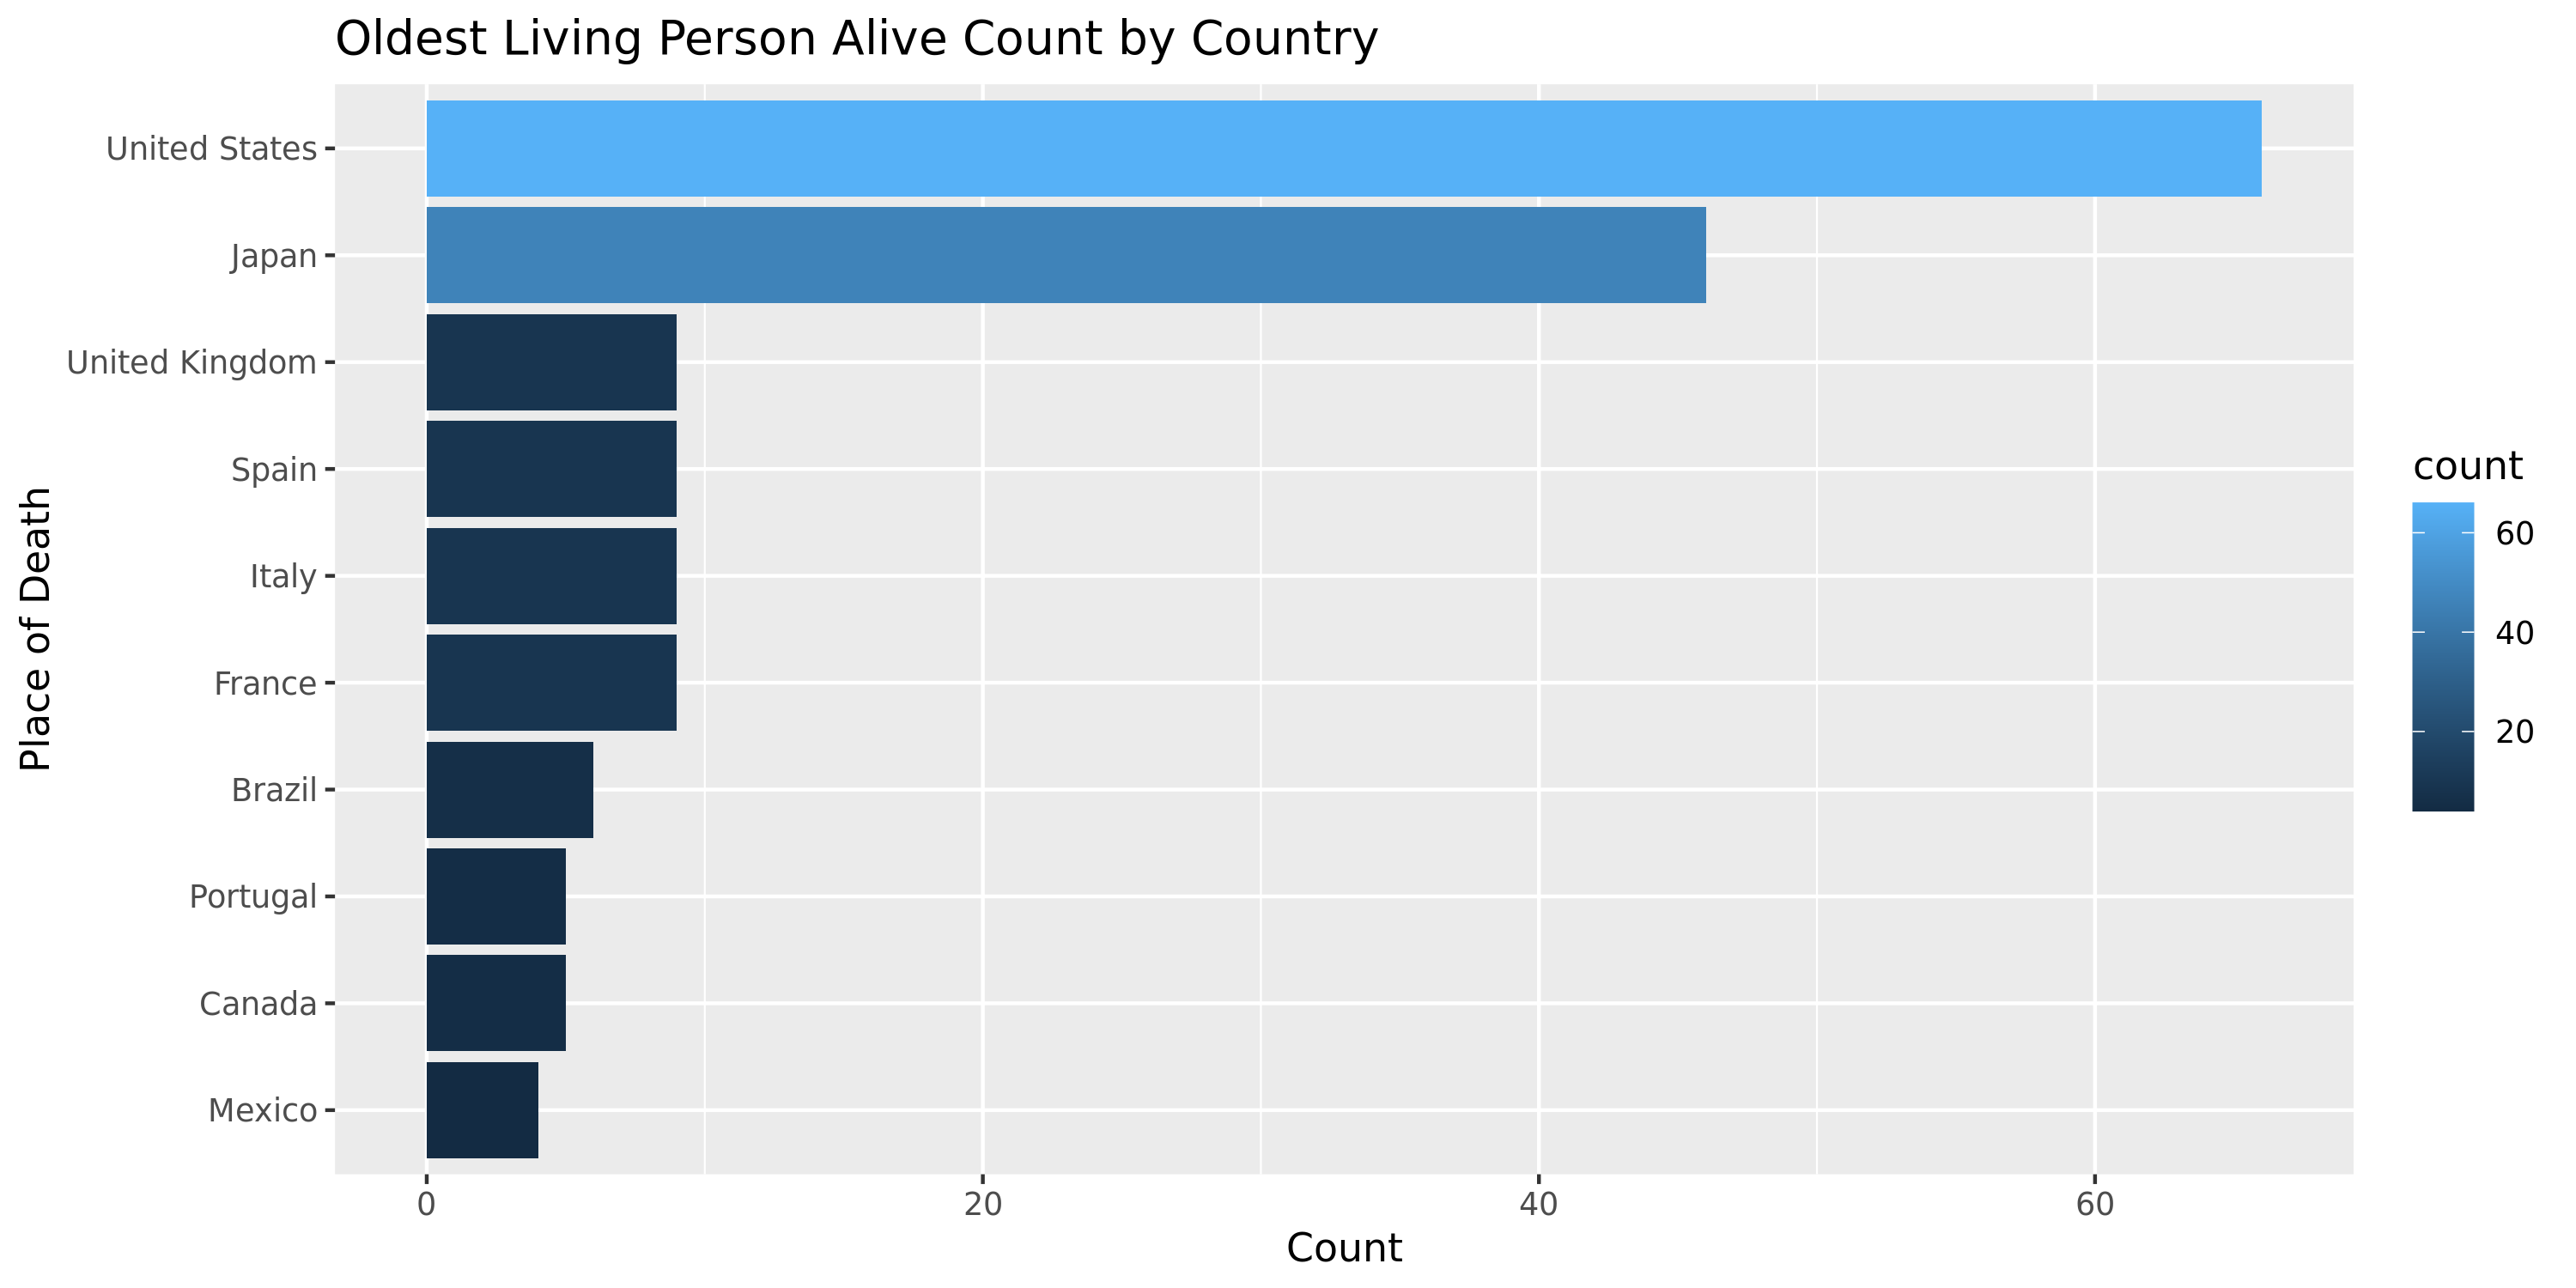

In [9]:
#Plot #2
options(repr.plot.width = 10, repr.plot.height = 5, repr.plot.res = 300)

p = ggplot(c_grouped, aes(y = reorder(place_of_death_or_residence, +count), x= count, fill = count))
p = p + geom_col()
p + xlab('Count') + ylab('Place of Death') + ggtitle('Oldest Living Person Alive Count by Country')

In [10]:
#get the top 10 of the 
top_10 = centenrians |> head(10)
top_10

,rank,name,birth_date,death_date,age,place_of_death_or_residence,gender,still_alive
,<int>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>
1,1,Jeanne Calment,1875-02-21,1997-08-04,122.4476,France,female,deceased
2,2,Kane Tanaka,1903-01-02,2022-04-19,119.2936,Japan,female,deceased
3,3,Sarah Knauss,1880-09-24,1999-12-30,119.2608,United States,female,deceased
4,4,Lucile Randon,1904-02-11,2023-01-17,118.9322,France,female,deceased
5,5,Nabi Tajima,1900-08-04,2018-04-21,117.7112,Japan,female,deceased
6,6,Marie-Louise Meilleur,1880-08-29,1998-04-16,117.6263,Canada,female,deceased
7,7,Violet Brown,1900-03-10,2017-09-15,117.5168,Jamaica,female,deceased
8,8,Emma Morano,1899-11-29,2017-04-15,117.3744,Italy,female,deceased
9,9,Chiyo Miyako,1901-05-02,2018-07-22,117.2211,Japan,female,deceased


Now, we would like to see if there is a certain lifespan time period that occurred more frequently than others (are there certain years people were born where they lasted longer than others?). For the top 10 people, we plotted the day of the birth (in blue) and death (in green). H

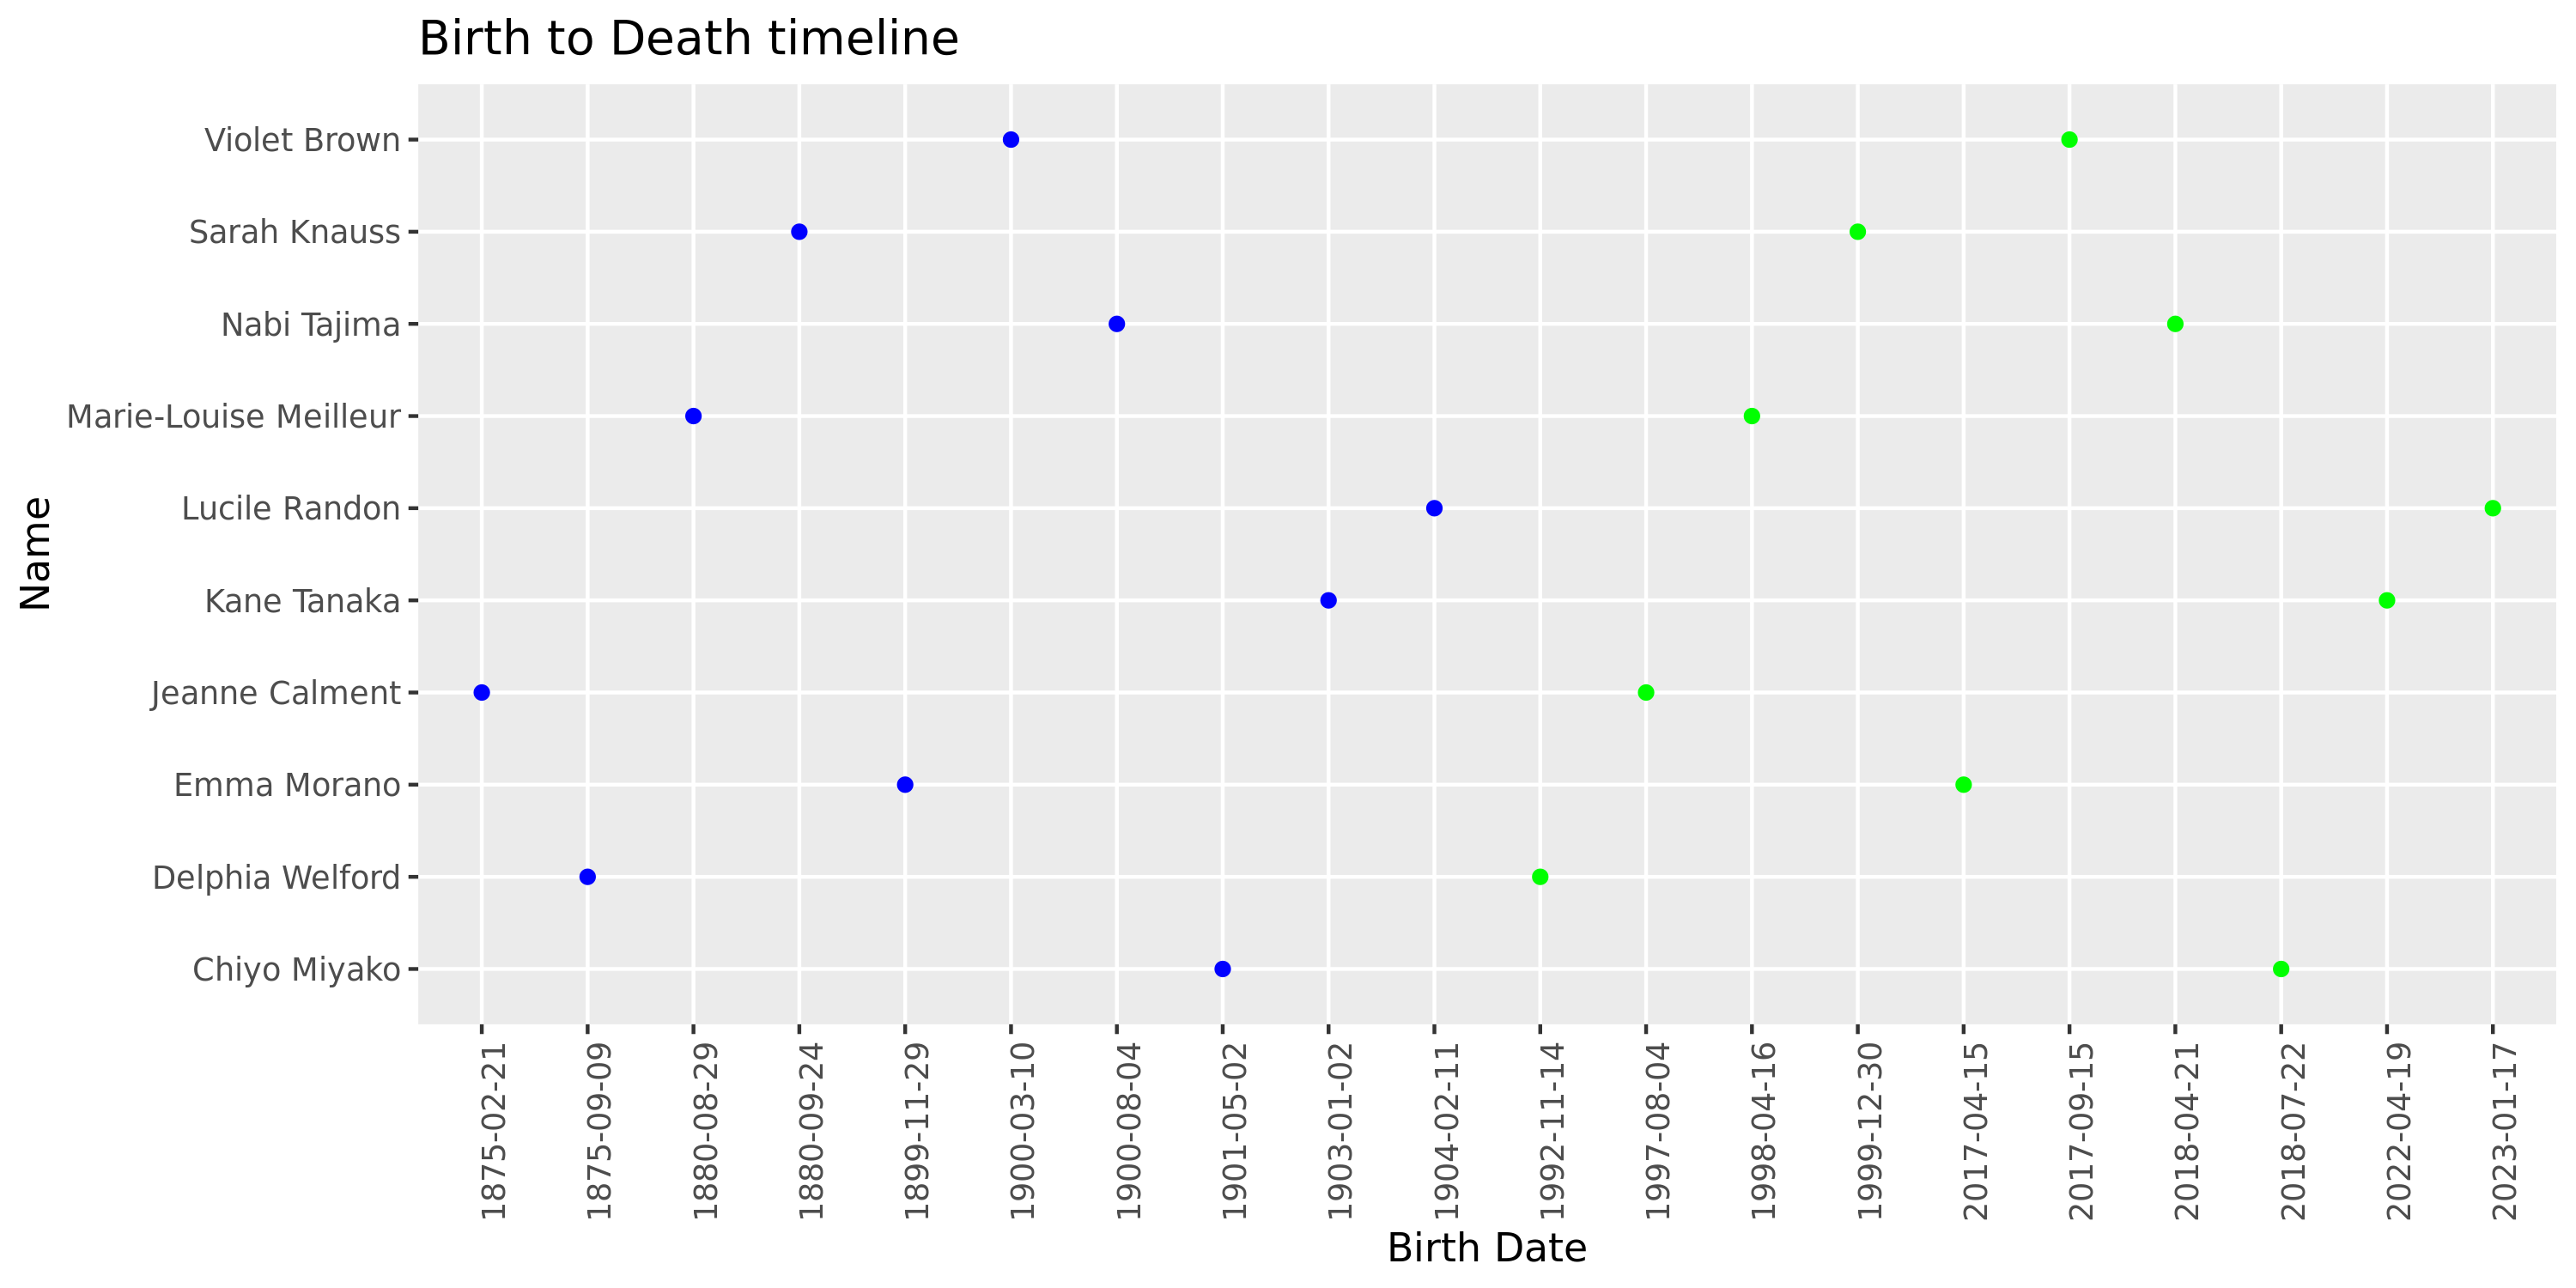

In [23]:
#Plot # 3
ggplot() + geom_point(data = top_10, mapping = aes(x = birth_date, y = name), color = "blue")+
geom_point(data = top_10, mapping = aes(x = death_date, y = name), color = "green") +
xlab('Birth Date') + ylab('Name') + ggtitle('Birth to Death timeline') +
theme(axis.text.x = element_text(angle = 90))